In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [40]:
raw_data = pd.read_csv('Lab12 Part2.csv')
raw_data = pd.DataFrame(raw_data).to_numpy()

time_raw = raw_data[:,0]
Bz_raw = raw_data[:,1]
mV_raw = raw_data[:,2]

dBz_raw = np.array([(Bz_raw[i+1]-Bz_raw[i-1])/(time_raw[i+1]-time_raw[i-1]) for i in range(1, len(time_raw) - 1)])


In [133]:
Bz_interp = interp1d(time_raw, Bz_raw, kind="linear")
dBz_interp = interp1d(time_raw[1:-1], dBz_raw, kind="linear")
mV_interp = interp1d(time_raw, mV_raw, kind="linear")

start_time = 8.3
stop_time = 9.8
step_size = 0.005
time = np.arange(start_time, stop_time, step_size)

Bz = Bz_interp(time)
dBz = dBz_interp(time)
mV = mV_interp(time)



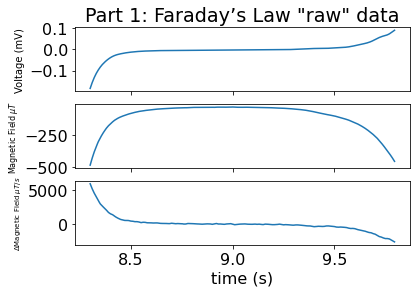

In [156]:
# Two subplots, the axes array is shared
# Choose the sensor for fitting.
f, axarr = plt.subplots(3, sharex=True)
# plt.xlim(start_time, stop_time)
axarr[0].plot(time, mV)
axarr[0].set_title('Part 2: Faraday’s Law "raw" data')
axarr[0].set_ylabel('Voltage (mV)', fontsize=10)
axarr[1].plot(time, Bz)
axarr[1].set_ylabel(r'Magnetic Field $\mu T$', fontsize=8)
axarr[2].plot(time, dBz)
axarr[2].set_xlabel('time (s)')
axarr[2].set_ylabel(r'$\Delta$Magnetic Field $\mu T / s$', fontsize=7)
plt.show()


In [135]:
def f_lin(x, m, b):
    return m * x + b


In [136]:
# Does the fit
lin_opt, lin_cov = opt.curve_fit(f_lin, dBz, mV)

# Best fit values
m, b = lin_opt
dm, db = np.sqrt(np.diag(lin_cov))

mV_pred = f_lin(dBz, m, b)


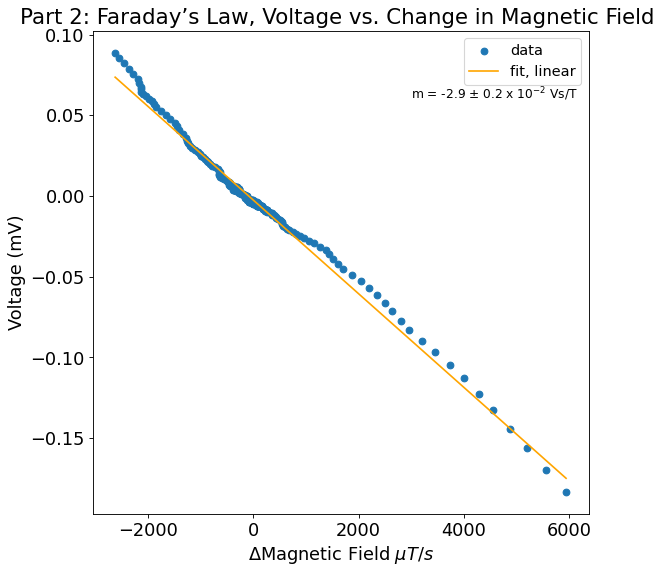

In [164]:
# Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

# Data and fit
plt.scatter(dBz, mV, label='data')
plt.plot(dBz, mV_pred, color='orange', label=r'fit, linear')

# Axes label and title
plt.title("Part 2: Faraday’s Law, Voltage vs. Change in Magnetic Field ")
plt.xlabel(r'$\Delta$Magnetic Field $\mu T / s$')
plt.ylabel("Voltage (mV)")
plt.text(3000,0.06, r'm = -2.9 ± 0.2 x $10^{-2}$ Vs/T', fontsize=11)
plt.legend(loc='upper right', prop={'size': 13})
plt.show()


In [158]:
m

-2.9015525578877673e-05